In [43]:
import kagglehub
import pandas as pd
import os


In [44]:
dataset_path = kagglehub.dataset_download("raedaddala/top-500-600-movies-of-each-year-from-1960-to-2024")

csv_filename = os.path.join(dataset_path, "final_dataset.csv")
df = pd.read_csv(csv_filename)

print("Loaded dataset from:", csv_filename)
print(df.head())


Loaded dataset from: C:\Users\Mansi\.cache\kagglehub\datasets\raedaddala\top-500-600-movies-of-each-year-from-1960-to-2024\versions\3\final_dataset.csv
          id                            title  year duration MPA  rating  \
0  tt0073195                             Jaws  1975    2h 4m  PG     8.1   
1  tt0073629    The Rocky Horror Picture Show  1975   1h 40m   R     7.4   
2  tt0073486  One Flew Over the Cuckoo's Nest  1975   2h 13m   R     8.7   
3  tt0072890                Dog Day Afternoon  1975    2h 5m   R     8.0   
4  tt0073692                          Shampoo  1975   1h 50m   R     6.4   

  votes  meta_score                                        description  \
0  690K        87.0  When a massive killer shark unleashes chaos on...   
1  174K        65.0  A newly-engaged couple have a breakdown in an ...   
2  1.1M        84.0  In the Fall of 1963, a Korean War veteran and ...   
3  281K        86.0  Three amateur robbers plan to hold up a Brookl...   
4   15K        65.0  

In [45]:
def convert_duration_to_minutes(duration):
    if pd.isna(duration):
        return 0  
    if isinstance(duration, int):
        return duration  

    total_minutes = 0
    parts = duration.split()
    for part in parts:
        if 'h' in part:
            total_minutes += int(part[:-1]) * 60 
        elif 'm' in part:
            total_minutes += int(part[:-1])  
    return total_minutes

df['duration'] = df['duration'].apply(convert_duration_to_minutes)




In [46]:
for col in df.columns:
    if df[col].dtype in ['int', 'int64', 'float64']: 
        df[col].fillna(0, inplace=True)
    else:
        df[col].fillna('n/a', inplace=True)

C:\Users\Mansi\AppData\Local\Temp\ipykernel_10368\4202546302.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('n/a', inplace=True)
C:\Users\Mansi\AppData\Local\Temp\ipykernel_10368\4202546302.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [41]:
import string

# Convert all string entries in the DataFrame to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

def clean_name_list(cell):
    if pd.isna(cell) or cell == 'n/a':
        return ['n/a']
    try:
        names = eval(cell) if isinstance(cell, str) and cell.startswith("[") else [cell]
    except:
        names = [cell]
    
    # Remove punctuation and join first+last name while keeping list format
    table = str.maketrans('', '', string.punctuation)
    cleaned = [''.join(name.translate(table).split()) for name in names]
    return cleaned  # returns a list like ['tomholland', 'jenniferaniston']

# Apply to relevant columns
for col in ['writers', 'directors', 'stars']:
    if col in df.columns:
        df[col] = df[col].apply(clean_name_list)

# Print to verify results
print("Writers column:\n", df['writers'].head(), "\n")
print("Directors column:\n", df['directors'].head(), "\n")
print("Stars column:\n", df['stars'].head(), "\n")

C:\Users\Mansi\AppData\Local\Temp\ipykernel_20580\1526783218.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


Writers column:
 0            [peterbenchley, carlgottlieb]
1              [richardobrien, jimsharman]
2    [lawrencehauben, bogoldman, kenkesey]
3     [frankpierson, pfkluge, thomasmoore]
4              [roberttowne, warrenbeatty]
Name: writers, dtype: object 

Directors column:
 0    [stevenspielberg]
1         [jimsharman]
2        [milosforman]
3        [sidneylumet]
4           [halashby]
Name: directors, dtype: object 

Stars column:
 0    [royscheider, robertshaw, richarddreyfuss, lor...
1    [timcurry, susansarandon, barrybostwick, richa...
2    [jacknicholson, louisefletcher, michaelberryma...
3    [alpacino, johncazale, penelopeallen, sullyboy...
4    [warrenbeatty, juliechristie, goldiehawn, leeg...
Name: stars, dtype: object 



In [35]:
import ast
import pandas as pd

In [42]:
import ast

def parse_list(cell):
    if isinstance(cell, list):
        return cell
    if isinstance(cell, float) and pd.isna(cell):
        return []
    if isinstance(cell, str) and cell.strip() == "":
        return []
    try:
        return ast.literal_eval(cell)
    except (ValueError, SyntaxError):
        return cell.split(", ") if isinstance(cell, str) else [cell]

In [ ]:
movie_data_dict = {}

for _, row in df.iterrows():
    id = row["id"]
    movie_data_dict[id] = {

        "title": row["title"],
        "year": row["year"],
        "duration": row["duration"],
        "MPA": row["MPA"],
        "rating": row["rating"],
        "votes": row["votes"],
        "meta_score": row["meta_score"],
        "description": row["description"],
        "Movie_Link": row["Movie_Link"],
        "writers": parse_list(row["writers"]),
        "directors": parse_list(row["directors"]),
        "stars": parse_list(row["stars"]),
        "budget": row["budget"],
        "opening_weekend_gross": row["opening_weekend_gross"],
        "gross_worldwide": row["gross_worldwide"],
        "gross_us_canada": row["gross_us_canada"],
        "release_date": row["release_date"],
        "countries_origin": parse_list(row["countries_origin"]),
        "filming_locations": parse_list(row["filming_locations"]),
        "production_companies": parse_list(row["production_companies"]),
        "awards_content": parse_list(row["awards_content"]),
        "genres": parse_list(row["genres"]),
        "languages": parse_list(row["languages"])
    }

first_5_keys = list(movie_data_dict.keys())[:5]  
for key in first_5_keys:
    print(f"Movie ID: {key}, Data: {movie_data_dict[key]}")


Movie ID: tt0073195, Data: {'title': 'jaws', 'year': 1975, 'duration': 124, 'MPA': 'pg', 'rating': 8.1, 'votes': '690k', 'meta_score': 87.0, 'description': "when a massive killer shark unleashes chaos on a beach community off long island, it's up to a local sheriff, a marine biologist, and an old seafarer to hunt the beast down.", 'Movie_Link': 'https://www.imdb.com/title/tt0073195', 'writers': ['peterbenchley', 'carlgottlieb'], 'directors': ['stevenspielberg'], 'stars': ['royscheider', 'robertshaw', 'richarddreyfuss', 'lorrainegary', 'murrayhamilton', 'carlgottlieb', 'jeffreykramer', 'susanbacklinie', 'jonathanfilley', 'tedgrossman'], 'budget': '$7,000,000 (estimated)', 'opening_weekend_gross': '$7,061,513', 'gross_worldwide': '$477,916,625', 'gross_us_canada': '$267,263,625', 'release_date': 1975.0, 'countries_origin': ['united states'], 'filming_locations': ["water street, edgartown, martha's vineyard, massachusetts, usa"], 'production_companies': ['zanuck/brown productions', 'unive

In [44]:
df_cleaned = pd.DataFrame.from_dict(movie_data_dict, orient="index")
df_cleaned.to_csv("./../cleaned_database/cleaned_final_dataset.csv", index_label="id")
print("Dictionary saved to ./../cleaned_database/cleaned_final_dataset.csv")


Dictionary saved to ./../cleaned_database/cleaned_final_dataset.csv


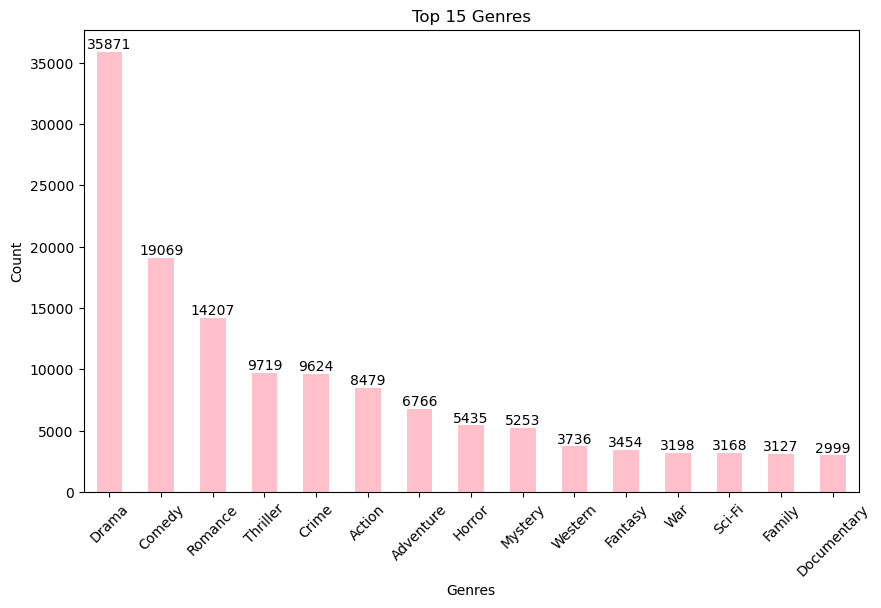

Total number of unique genres: 192


In [51]:
import matplotlib.pyplot as plt

def safe_eval(x):
    try:
        return eval(x) if isinstance(x, str) else x
    except Exception as e:
        return []

df['genres'] = df['genres'].apply(safe_eval)

df = df.dropna(subset=['genres'])

df_exploded = df.explode('genres')

genre_counts = df_exploded['genres'].value_counts()

top_10_genres = genre_counts.head(15)

plt.figure(figsize=(10, 6))
ax = top_10_genres.plot(kind='bar', color='pink')

for i, v in enumerate(top_10_genres):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 15 Genres')
plt.xticks(rotation=45)
plt.show()

total_unique_genres = len(genre_counts)
print(f"Total number of unique genres: {total_unique_genres}")
